In [1]:
import os
import pandas as pd
# import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns

import nltk
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Challenge 1: Histogram

1. Create a histogram of life expectency across all 142 countries in the gapminder dataset. Play with the `bins=` parameter to find the most informative bin number.

In [2]:
# Set working directory
# %pwd
os.getcwd()

'/Users/tomvannuenen/Documents/GitHub/DIGHUM101-2022/Notebooks/Challenges/Solutions/Week2'

In [3]:
# Change working directory
os.chdir("../../../../Data/")
os.getcwd()

'/Users/tomvannuenen/Documents/GitHub/DIGHUM101-2022/Data'

In [4]:
# List files in working directory
%ls

Geo/                          feminism.json
childrens_lit.csv             feminism.xml
compound_figure.pdf           frankenstein.txt
correspondence-data-1585.csv  gapminder-FiveYearData.csv
dracula.txt                   human-rights/
example.json                  iris.csv
example.xml                   music_reviews.csv


In [5]:
# Import gapminder
gap = pd.read_csv("gapminder-FiveYearData.csv")
gap.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


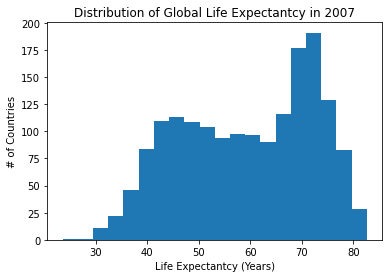

In [6]:
plt.hist(gap['lifeExp'], bins=20)
plt.title('Distribution of Global Life Expectantcy in 2007')
plt.xlabel('Life Expectantcy (Years)')
plt.ylabel('# of Countries');

# Challenge 2: Bar plot

Make a bar plot for the 20 most frequently occuring words found in "fiji2014.txt"

In [7]:
# Import fiji2014.txt
fiji = open("./human-rights/fiji2014.txt", encoding = "utf-8").read()
print(fiji)

 
 United Nations 
 A/HRC/28/8 
 
 

 General Assembly 
 Distr.: General 
17 December 2014 
 
Original: English 
 

Human Rights Council 

Twenty-eighth session 
Agenda item 6 
Universal Periodic Review 
  Report of the Working Group on the Universal Periodic Review* 
 * The annex to the present report is circulated as received. 
  Fiji 
Contents 
 Paragraphs Page 
  Introduction .............................................................................................................  1Ð4 3 
 I. Summary of the proceedings of the review process ................................................  5Ð98 3 
  A. Presentation by the State under review ...........................................................  5Ð20 3 
  B. Interactive dialogue and responses by the State under review ........................  21Ð98 5 
 II. Conclusions and/or recommendations .....................................................................  99Ð102 13 
 Annex 
  Composition of the delegation ............

In [8]:
from collections import Counter

In [9]:
# Tokenize single words in fiji
fiji_tokens = fiji.split()

In [10]:
# Show the ten most common
freq = Counter(fiji_tokens)
for_bar = freq.most_common(20)
for_bar

[('the', 812),
 ('and', 469),
 ('of', 461),
 ('to', 344),
 ('in', 178),
 ('on', 122),
 ('for', 102),
 ('rights', 99),
 ('that', 96),
 ('human', 86),
 ('a', 86),
 ('with', 85),
 ('Fiji', 70),
 ('by', 64),
 ('made', 63),
 ('It', 62),
 ('had', 60),
 ('The', 51),
 ('Rights', 50),
 ('as', 50)]

In [11]:
# or
fiji_df = pd.DataFrame(for_bar, columns = ["Word", "Frequency"])
fiji_df

,Word,Frequency
0,the,812
1,and,469
2,of,461
3,to,344
4,in,178
5,on,122
6,for,102
7,rights,99
8,that,96
9,human,86


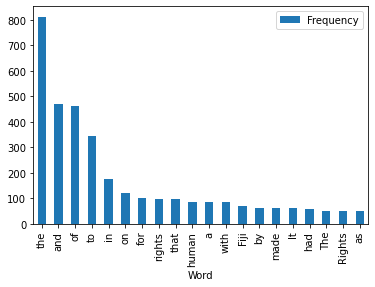

In [12]:
fiji_df.plot.bar(x = "Word", y = "Frequency");

How would this visualization change if you first removed the stopwords? 

In [13]:
stop = stopwords.words("english")
no_stops = [word for word in fiji_tokens if word not in stopwords.words('english')]
freq_fiji = Counter(no_stops)
for_nostops = freq_fiji.most_common(20)
for_nostops

[('rights', 99),
 ('human', 86),
 ('Fiji', 70),
 ('made', 63),
 ('It', 62),
 ('The', 51),
 ('Rights', 50),
 ('international', 50),
 ('recommendations.', 46),
 ('Constitution', 35),
 ('ensure', 34),
 ('Human', 32),
 ('steps', 31),
 ('freedom', 31),
 ('Take', 28),
 ('women', 26),
 ('violence', 25),
 ('measures', 25),
 ('noted', 24),
 ('welcomed', 24)]

In [14]:
# or
fiji_nostops = pd.DataFrame(for_nostops, columns = ["Word", "Frequency"])
fiji_nostops

,Word,Frequency
0,rights,99
1,human,86
2,Fiji,70
3,made,63
4,It,62
5,The,51
6,Rights,50
7,international,50
8,recommendations.,46
9,Constitution,35


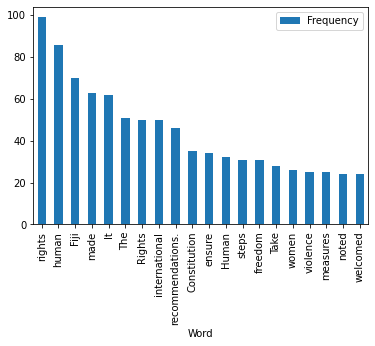

In [15]:
# What changed?
fiji_nostops.plot.bar(x = "Word", y = "Frequency");

# Challenge 3: Understanding Seaborn Code

Matplotlib is good, but seaborn is better! We can do more with less code - you might even find the syntax a little easier to understand. [Start looking through examples here](https://seaborn.pydata.org/tutorial.html).

What can you understand from the code for the [seaborn scatterplot documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)? **_Why_** does the code in the below cell produce the figure that it does? Experiemnt by changing the various arguments and see what happens!

The code below shows a scatterplot for life expectancy and GDP per capita income from the gapminder dataset.

In [16]:
gap.columns

Index(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'], dtype='object')

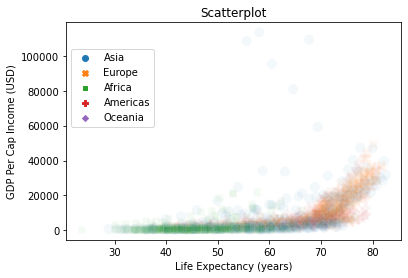

In [17]:
scatterplot = sns.scatterplot(x = "lifeExp", y = "gdpPercap", 
                              hue = "continent", style = "continent", 
                              s = 100, alpha = 0.05, data = gap)
scatterplot.legend(loc = "center left", bbox_to_anchor = (0, 0.7), ncol = 1)
scatterplot.set(xlabel = "Life Expectancy (years)", 
                ylabel = "GDP Per Cap Income (USD)", 
                title = "Scatterplot");

# Challenge 4: Faceting

In the iris dataset, facet out each of the species into its own facetted plot, and make a scatterplot of the "Sepal.Length" and "Sepal.Width" (hint: look at the end of notebook 2-2 to find out how to do this).

In [18]:
# Import iris
iris = pd.read_csv("iris.csv")
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


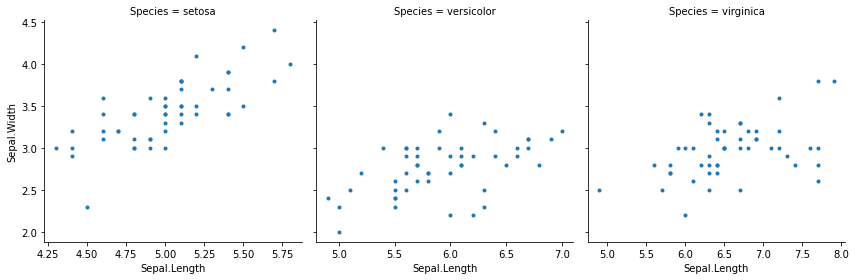

In [19]:
scatterplot_facet = sns.FacetGrid(iris, col = "Species", 
                                  col_wrap = 3, height = 4, sharex = False)
scatterplot_facet.map(plt.scatter, "Sepal.Length", "Sepal.Width", marker = ".");

# Challenge 5: Seaborn Boxplot

Make boxplots for each Species (x-axis) by Petal.Length (Y-axis) in the iris dataset.

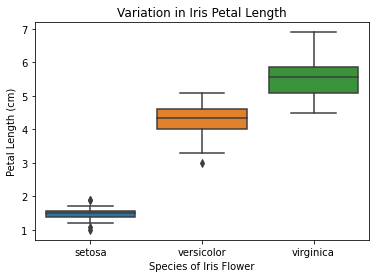

In [20]:
iris_box = sns.boxplot(x = "Species", y = "Petal.Length", 
                       data = iris)
iris_box.set(xlabel = "Species of Iris Flower", 
             ylabel = "Petal Length (cm)", 
             title = "Variation in Iris Petal Length");

# Challenge 6: Line plot

What if we are interested in _something_ and how it has changed through time? Line plots are the standard for doing so - let's look at change in per-capita GDP through time for Mexico, USA, and Canada. 

In [21]:
# Create a subset of only Mexico data
mexico = gap[gap["country"] == "Mexico"]

# ... of USA data
usa = gap[gap["country"] == "United States"]

# ... and of Canada data
canada = gap[gap["country"] == "Canada"]

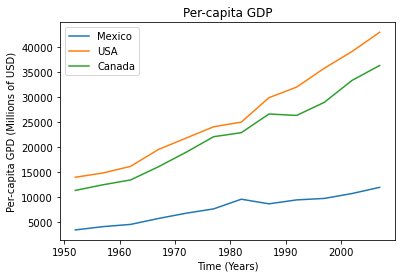

In [22]:
# Plot!
plt.plot(mexico["year"], mexico["gdpPercap"], label = "Mexico")
plt.plot(usa["year"], usa["gdpPercap"], label = "USA")
plt.plot(canada["year"], canada["gdpPercap"], label = "Canada")
plt.title('Per-capita GDP')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)')
plt.legend();

# Challenge 7: Subplots

Create one compoud plot that contains to line plots for Mexico's and Canada's gdpPercap through time! Combine these into a single figure. Don't forget the `label` and `color` attributes when calling the plot. Add relevant labels for the x and y-axes using `xlabel` and `ylabel`. Save your figure to your working directory, naming it "compound_figure.pdf" at 600 dpi. Good luck!

Tip: try doing `plt.plot` twice, using both dataframe columns (e.g. `plt.plot(mexico["year"], mexico["gdpPercap"]`) .

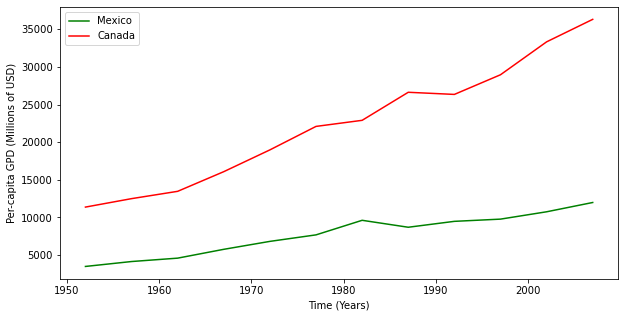

In [23]:
plt.figure(figsize=(10,5))

plt.plot(mexico["year"], mexico["gdpPercap"], label = "Mexico", color = "green")
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)')

plt.plot(canada["year"], canada["gdpPercap"], label="Canada", color="red")
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)')
plt.legend()
plt.savefig("compound_figure.pdf", dpi = 600);